In [ ]:
;0

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NLP/review.csv')
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
df.shape

(999, 3)

In [ ]:
df.shape

(999, 3)

In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()


,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


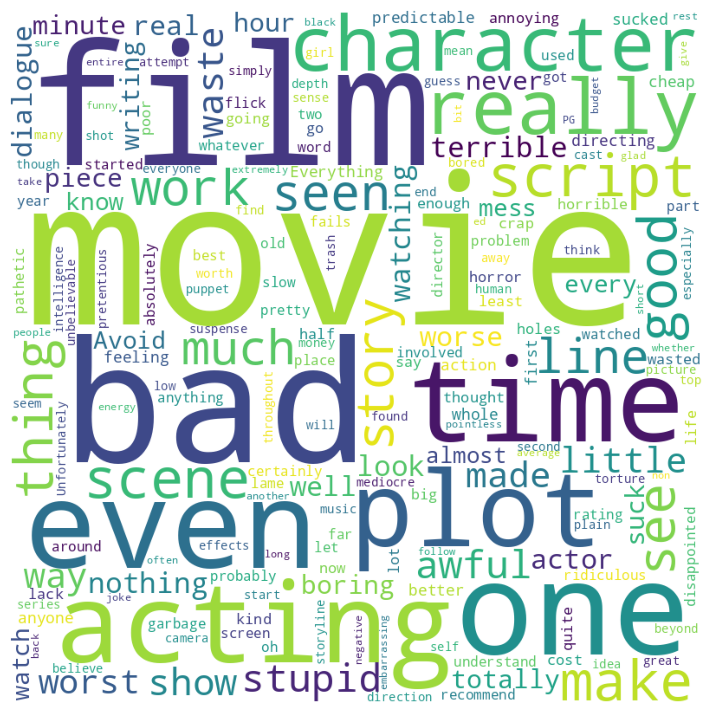

In [ ]:
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate("".join(df[df['sentiment']==0]['review']))

plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.axis("off")
plt.show()


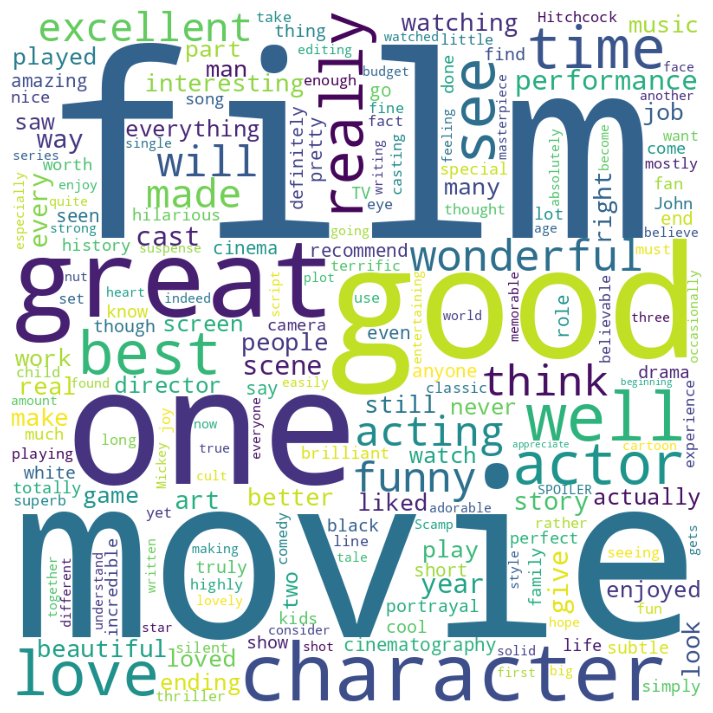

In [ ]:
 #create a wordcloud for good review
 wc1=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
 wc1.generate("".join(df[df['sentiment']==1]['review']))

#show the wordcloud
plt.figure(figsize=(9,9))
plt.imshow(wc1)
plt.axis('off')
plt.show()

In [ ]:
#now text preprocessing
def clean_text(text):
  stop=stopwords.words('english')   #atopwors list
  punc=list(punctuation)  #punctuation list
  bad_tokens=stop + punc
  lemma=WordNetLemmatizer()
  tokens=word_tokenize(text)
  word_tokens=[t for t in tokens if t.isalpha()] #removing number
  clean_token= [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens ]
  return " ".join(clean_token)


In [ ]:
#call function
df['review']=df['review'].apply(clean_text)

In [ ]:
x=df['review']
y=df['sentiment']

In [ ]:
#train test he model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#number of word/tokens in given santance
sent_len=[]
for sent in df['review']:
  sent_len.append(len(word_tokenize(sent)))

#to add new column in df
df['sent_len']=sent_len
df.head()

,review,sentiment,sent_len
0,not sure lost flat character audience nearly h...,0,9
1,attempting artiness black white clever camera ...,0,17
2,very little music anything speak,0,5
3,the best scene movie gerardo trying find song ...,1,11
4,the rest movie lack art charm meaning if empti...,0,13


In [ ]:
max(sent_len)

39

In [ ]:
df['sent_len'].unique()

array([ 9, 17,  5, 11, 13,  3,  6,  4, 16,  8, 10,  7, 12, 14, 23,  2, 18,
       15, 19, 21,  1,  0, 22, 25, 27, 26, 37, 24, 20, 29, 33, 28, 39])

In [ ]:
df['sent_len'].value_counts()

,count
sent_len,
6,108
5,101
4,97
3,94
8,84
7,79
9,62
2,59
10,56


In [ ]:
np.quantile(sent_len,0.95) #taken santance 95% and 5% secrify
# we are goin to take 18 unit for RNN
max_len=18


In [ ]:
#we can see that 95% review text(tokens) are of lenghts less than or equal to 18,
#we'll keeps the max lenght to 18

In [ ]:
#Tokenization(keras tokenizer)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
#Tokenization
#create object of Tokenizer class
tok=Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [ ]:
tok.index_word

{1: 'i',
 2: 'movie',
 3: 'the',
 4: 'film',
 5: 'it',
 6: 'this',
 7: 'one',
 8: 'bad',
 9: 'character',
 10: 'good',
 11: 'like',
 12: 'time',
 13: 'even',
 14: 'acting',
 15: 'really',
 16: 'great',
 17: 'well',
 18: 'scene',
 19: 'see',
 20: 'story',
 21: 'make',
 22: 'actor',
 23: 'best',
 24: 'work',
 25: 'but',
 26: 'made',
 27: 'could',
 28: 'plot',
 29: 'think',
 30: 'thing',
 31: 'look',
 32: 'ever',
 33: 'seen',
 34: 'script',
 35: 'love',
 36: 'better',
 37: 'way',
 38: 'wonderful',
 39: 'would',
 40: 'year',
 41: 'real',
 42: 'also',
 43: 'there',
 44: 'much',
 45: 'watch',
 46: 'watching',
 47: 'line',
 48: 'performance',
 49: 'part',
 50: 'never',
 51: 'excellent',
 52: 'stupid',
 53: 'show',
 54: 'cast',
 55: 'life',
 56: 'anyone',
 57: 'little',
 58: 'go',
 59: 'a',
 60: 'nothing',
 61: 'get',
 62: 'every',
 63: 'know',
 64: 'give',
 65: 'people',
 66: 'two',
 67: 'if',
 68: 'music',
 69: 'recommend',
 70: 'funny',
 71: 'all',
 72: 'say',
 73: 'pretty',
 74: 'dialogue'

In [ ]:
vocab_len=len(tok.index_word)
vocab_len

2330

In [ ]:
sequence_train=tok.texts_to_sequences(x_train)
#texts_to_sequences() inbuild functionns of keras (vectorixation)
sequence_train


[[3, 198, 134, 870, 24, 135, 118, 871, 84, 340],
 [7, 119, 341, 2, 1, 32, 33],
 [5, 872, 2, 10],
 [25, 342, 199, 44, 873, 343, 344],
 [155,
  874,
  875,
  345,
  3,
  53,
  346,
  156,
  8,
  200,
  13,
  518,
  258,
  3,
  54,
  347,
  348,
  349,
  876,
  258,
  3,
  53],
 [877,
  878,
  32,
  16,
  519,
  201,
  20,
  879,
  350,
  202,
  880,
  881,
  882,
  203,
  883,
  884,
  201,
  120,
  204,
  259],
 [1, 29, 4, 351, 885, 520, 886, 62, 85],
 [3, 205, 9, 206, 1, 260, 887],
 [5, 15, 10, 53, 45],
 [5, 521, 888, 207, 352, 157, 353, 889, 9, 55],
 [890, 891, 892],
 [71, 84, 522, 4, 893, 894, 895, 896, 54],
 [5, 261],
 [1,
  523,
  86,
  8,
  354,
  4,
  134,
  1,
  15,
  11,
  208,
  4,
  8,
  1,
  158,
  7,
  159,
  56,
  27,
  524],
 [1, 897, 121, 136, 8, 72],
 [20, 525, 898, 899, 900, 526, 40, 527, 15, 528, 901, 529, 530, 9, 902],
 [355, 63, 1, 262],
 [3, 34, 34],
 [1, 63, 903, 904, 356, 27, 44, 905, 17, 906],
 [71, 1, 64, 7, 907],
 [357,
  121,
  2,
  531,
  13,
  908,
  1,
  7

In [ ]:
squences_matrix_train=sequence.pad_sequences(sequence_train,maxlen=max_len)
squences_matrix_train


array([[  0,   0,   0, ..., 871,  84, 340],
       [  0,   0,   0, ...,   1,  32,  33],
       [  0,   0,   0, ..., 872,   2,  10],
       ...,
       [  0,   0,   0, ...,  13,  41,   2],
       [  0,   0,   0, ...,   1,  27,  58],
       [  0,   0,   0, ...,   5, 455, 813]], dtype=int32)

In [ ]:
#Now ceate a Sequential model means goes to neural network to train the model
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Embedding,SimpleRNN,LSTM,GRU
#create the object of Sequential class
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#2nd parameter=500 pass the output length
#model.add(SimpleRNN(32,activation='tanh')) #tanh activation function use in sequential data
#model.add(LSTM(32))
model.add(GRU(108,activation='tanh'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#train the model
model.fit(squences_matrix_train,y_train,batch_size=50,epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5299 - loss: 0.6908
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8722 - loss: 0.6075
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9356 - loss: 0.2339
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9786 - loss: 0.0818
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9902 - loss: 0.0384
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9981 - loss: 0.0066
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9999 - loss: 0.0054
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9986 - loss: 0.0029
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accurac

In [ ]:
#test the model with 30% data
x_test


,review
507,what film lack convincing script
608,there also enough hypocrisy film make vomit
452,not even good camp value
368,it make scared horrified make sympathetic towa...
242,the film great actor master director significa...
...,...
430,i filmmaker i director i would hide head sand ...
587,even woman finally show sign improvement expec...
550,this may bad film ever made
607,and accent absolutely abysmal


In [ ]:
#doing all the preproceesing with x_test data because all the data is in the form of character
sequence_matrix_test=sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len) #tokenize and padding happens at same time

In [ ]:
sequence_matrix_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       306,   4, 203, 411,  34], dtype=int32)

In [ ]:
#prediction
y_pred=model.predict(sequence_matrix_test)
np.round(y_pred,2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


array([[0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.45],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.77],
       [1.  ],
       [0.  ],
       [0.99],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.17],
       [1.  ],
       [0.01],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.03],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.87],
       [0.  ],
       [0.16],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.43],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.59],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.

In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       102
           1       0.74      0.76      0.75        98

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[76 26]
 [24 74]]
